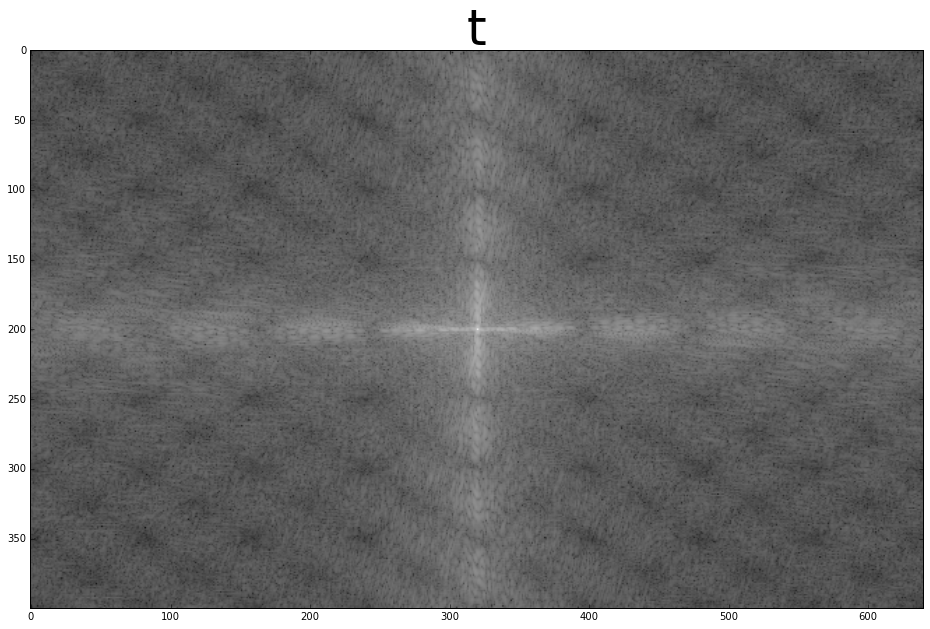

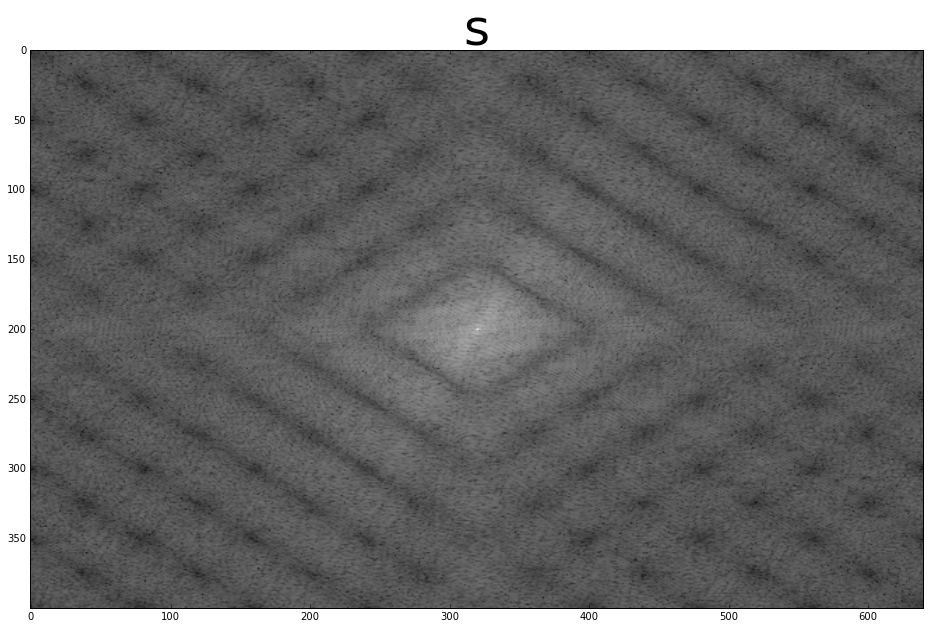

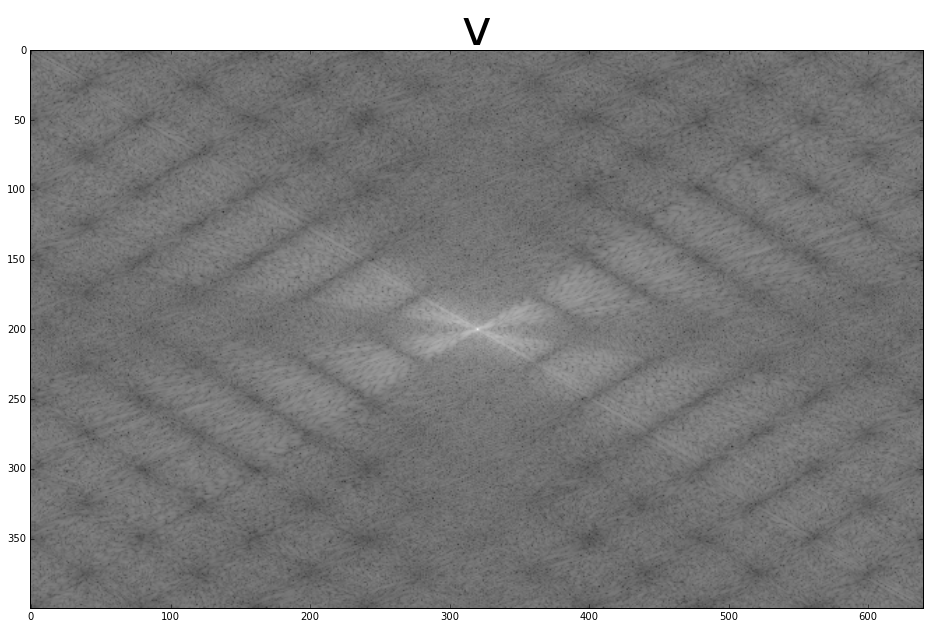

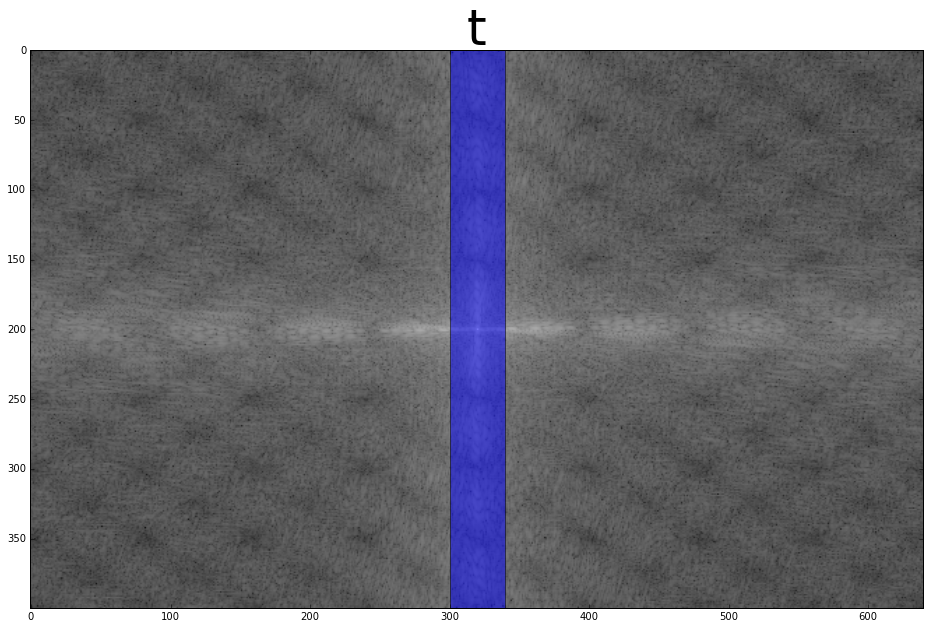

In [66]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.pylab as pylab


from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

Ts = ['./characters/T1.GIF','./characters/T2.GIF','./characters/T3.GIF',
      './characters/T4.GIF','./characters/T5.GIF','./characters/T6.GIF',
      './characters/T7.GIF','./characters/T8.GIF','./characters/T9.GIF',
      './characters/T10.GIF']
Ss = ['./characters/S1.GIF','./characters/S2.GIF','./characters/S3.GIF',
      './characters/S4.GIF','./characters/S5.GIF','./characters/S6.GIF',
      './characters/S7.GIF','./characters/S8.GIF','./characters/S9.GIF',
      './characters/S10.GIF']
Vs = ['./characters/V1.GIF','./characters/V2.GIF','./characters/V3.GIF',
      './characters/V4.GIF','./characters/V5.GIF','./characters/V6.GIF',
      './characters/V7.GIF','./characters/V8.GIF','./characters/V9.GIF',
      './characters/V10.GIF']
testTs = ['./testChars/tT1.gif','./testChars/tT2.gif','./testChars/tT3.gif',
         './testChars/tT4.gif','./testChars/tT5.gif','./testChars/tT6.gif',
         './testChars/tT7.gif','./testChars/tT8.gif','./testChars/tT9.gif',
         './testChars/tT10.gif',]
testSs = ['./testChars/tS1.gif','./testChars/tS2.gif','./testChars/tS3.gif',
         './testChars/tS4.gif','./testChars/tS5.gif','./testChars/tS6.gif',
         './testChars/tS7.gif','./testChars/tS8.gif','./testChars/tS9.gif',
         './testChars/tS10.gif',]
testVs = ['./testChars/tV1.gif','./testChars/tV2.gif','./testChars/tV3.gif',
         './testChars/tV4.gif','./testChars/tV5.gif','./testChars/tV6.gif',
         './testChars/tV7.gif','./testChars/tV8.gif','./testChars/tV9.gif',
         './testChars/tV10.gif',]

def plotFT(name):
    f = io.imread(name)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    Magq =  np.absolute(q)         # magnitude spectrum
    Phaseq = np.angle(q)           # phase spectrum
    ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.
    plt.show()

def getFTs(images):    
    fts = []
    for image in images:
        f = io.imread(image)   # read in image
        f_f = np.array(f, dtype=float)
        z = np.fft.fft2(f_f)           # do fourier transform
        q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
        fts.append(q)
    return fts 

def getFT(image):
    f = io.imread(image)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    return q
    
def superImposeAndPlot(fts,letter):  
    average = np.sum(fts, axis=0)
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.axis("on")
    ax1.set_title(letter, {'fontsize':50})
    ax1.imshow( np.log( np.absolute(average) + 1 ), cmap='gray' ) # io.
    plt.show()    
    
def plotMasks(fts, letter):
    average = np.sum(fts, axis=0)
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.add_patch(mpatches.Rectangle(
    (300, 0),   # (x,y)
    40,          # width
    400,          # height
    alpha=0.5        
    )
    )
    ax1.axis("on")
    ax1.set_title(letter, {'fontsize':50})
    ax1.imshow( np.log( np.absolute(average) + 1 ), cmap='gray' ) # io.
    plt.show()
    
        

superImposeAndPlot(getFTs(Ts),"t")   
superImposeAndPlot(getFTs(Ss),"s")
superImposeAndPlot(getFTs(Vs),"v")
plotMasks(getFTs(Ts),"t");


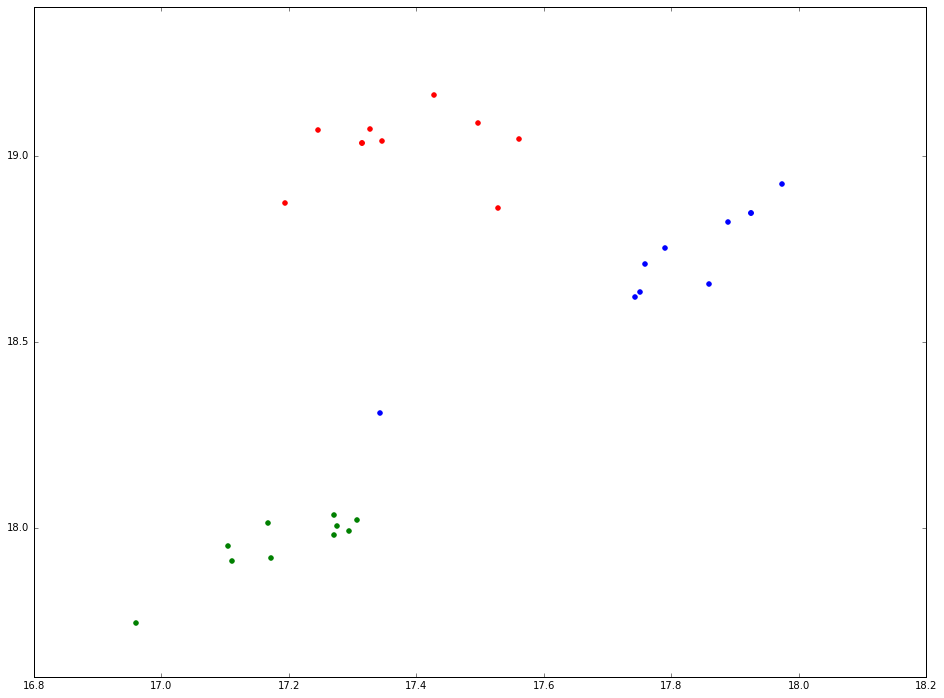

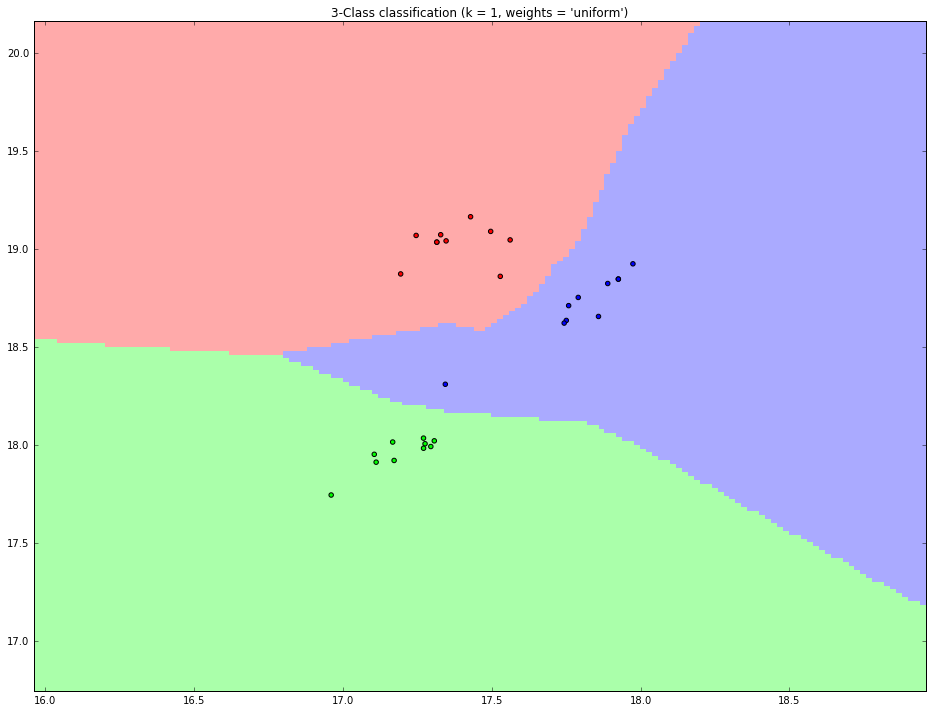

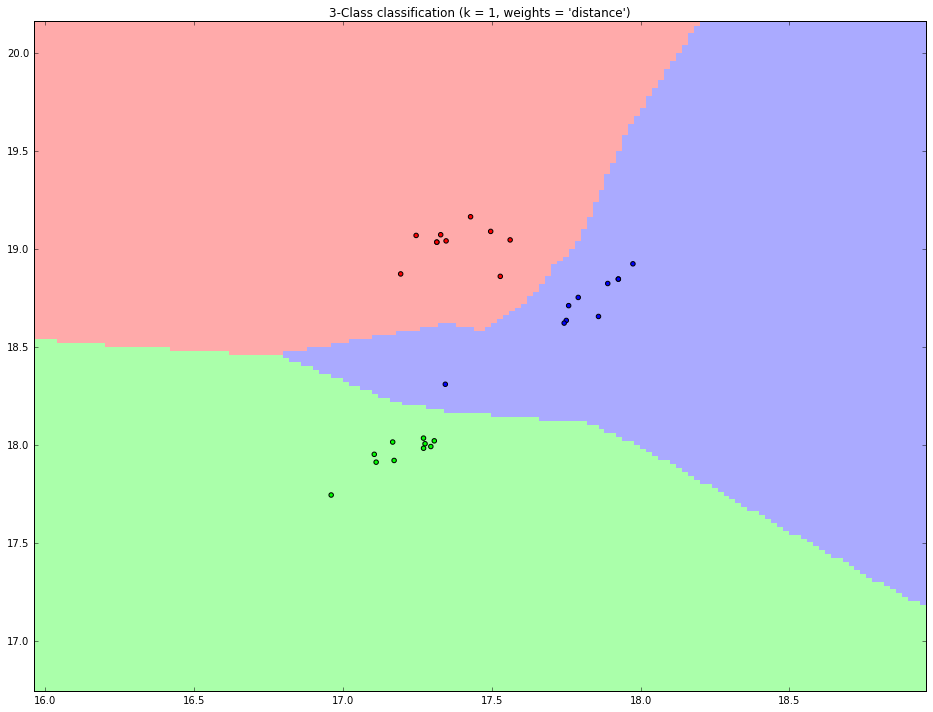

In [67]:
def getAverage(mag):
    w, h = len(mag[0]), len(mag)       
    average  = (sum([sum([mag[y][x] for x in range(w)]) for y in range(h)])) / w+h
    return average



def sector(mag):
    w, h = len(mag[0]), len(mag)
    radius     = 100
    centre     = [320,200]
    startAngle = 30
    endAngle   = 60
    
    sectorFilter = buildSectorFilter(radius,centre, mag, startAngle, endAngle)[1]
    average = np.amax(mag)

    size = lambda x,y : True if mag[y][x] < average else False
    filterVals = lambda x, y : mag[y][x] if (sectorFilter[y][x] == 1) and size(x,y) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])
    

def buildSectorFilter( radius, aCentre, array2d, startAng, endAng):
    # create boolean sector mask. startAng = 0 will read from x-axis clockwise.
    #matrix2d # converting to allow compatibility with
    shape = array2d.shape
    x,y = np.ogrid[:shape[0],:shape[1]]
    cx = aCentre[0]
    cy = aCentre[1]
    thetaStart, thetaEnd = np.deg2rad((startAng, endAng))
    # test stop angle larger than start angle
    if thetaEnd < thetaStart:
            thetaStart += 2*np.pi

    # cartesian to polar
    rPolar = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    theta = np.arctan2(x-cx,y-cy) - thetaStart
    # wrap angles between 0 and 2*pi
    theta %= (2*np.pi)
    # circle filter
    circleFilter = rPolar <= radius*radius
    # sector filter
    angFilter = theta <= (thetaEnd-thetaStart)
    sectorFilter = circleFilter*angFilter
    sector = np.array(sectorFilter)
    return (sector.flatten(), sector)

def ring(mag):
    inner = 50
    outer = 60
    average = np.amax(mag)
    
    w, h = len(mag[0]), len(mag)
    size = lambda x,y : True if mag[y][x] <=  0.8 * average   else False
    d = lambda x, y : ((x-w//2)**2 + (y-h//2)**2)**0.5
    inRing = lambda x, y : inner <= d(x, y) and d(x, y) <= outer
    filterVals = lambda x, y : mag[y][x] if (inRing(x, y) and size(x,y))  else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def cross(mag):
    xmin = 315
    xmax = 325
    ymin = 190
    ymax = 210
    average = getAverage(mag)
    w, h = len(mag[0]), len(mag)
    
    size = lambda x,y : True if mag[y][x] < average else False
    inRect = lambda x, y : (xmin <= x <= xmax) or (ymin <= y <= ymax)
    filterVals = lambda x, y : mag[y][x] if (inRect(x, y) and size(x,y)) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def bar(mag):
    xmin = 315
    xmax = 325
    average = np.amax(mag)
    w, h = len(mag[0]), len(mag)
    
    size = lambda x,y : True if mag[y][x] <= 0.8 * average else False
    inRect = lambda x, y : (xmin <= x <= xmax)
    filterVals = lambda x, y : mag[y][x] if (inRect(x, y) and size(x,y)) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def getCrossFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(cross(np.absolute(ft))))
    return vals

def getBarFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(bar(np.absolute(ft))))
    return vals

def getSectorFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(sector(np.absolute(ft))))
    return vals

def getRingFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(ring(np.absolute(ft))))
    return vals


def plotScatter(x1,x2,x3,y1,y2,y3):  
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    plt.scatter(x1, y1, color="r")
    plt.scatter(x2, y2, color="g")
    plt.scatter(x3, y3, color="b")
    plt.show()  

    
def plotDecision(X, y, n_neighbors):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    fourierTest = getFTs(testTs)
    t1 = getRingFeatureVals(fourierTest)
    t2 = getBarFeatureVals(fourierTest)

    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))
    plt.show()
    
def plotTestDataDecisions(X, y, t, s, v, n_neighbours):
    h = .02  # step size in the mesh
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    fourierTest = getFTs(testTs)
    t1 = getRingFeatureVals(fourierTest)
    t2 = getBarFeatureVals(fourierTest)
    
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
        
#         testTLabels = cp

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
       
        # Classify test data #
        testSLabels = clf.predict(s)
        testTLabels = clf.predict(t)
        testVLabels = clf.predict(v)




        # Put the result into a colour plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot test data classification
        # * - S, ^ - T, + - V,dentoes actual label while colour denotes assigned label 
        for i in range(0, len(s)):
            if testSLabels[i] == 0:
#                 plt.scatter(s[i,0], s[i,1], c='r', marker='*', s=85)
            elif testSLabels[i] == 1:
                plt.scatter(s[i,0], s[i,1], c='g', marker='*', s=85)
            else:
                plt.scatter(s[i,0], s[i,1], c='b', marker='*', s=85)   

        for i in range(0, len(t)):
            if testTLabels[i] == 0:
                plt.scatter(t[i,0], t[i,1], c='r', marker='^', s=85)
            elif testTLabels[i] == 1:
                plt.scatter(t[i,0], t[i,1], c='g', marker='^', s=85)
            else:
                plt.scatter(t[i,0], t[i,1], c='b', marker='^', s=85)  

        for i in range(0, len(v)):
            if testVLabels[i] == 0:
                plt.scatter(v[i,0], v[i,1], c='r', marker='x', s=85)
            elif testVLabels[i] == 1:
                plt.scatter(v[i,0], v[i,1], c='g', marker='x', s=85)
            else:
                plt.scatter(v[i,0], v[i,1], c='b', marker='x', s=85)  

        # Plot also the training points
        #         plt.scatter(trainData[:, 0], trainData[:, 1], c=trainLabels, cmap=cmap_bold, s=85)

        # Plot Legend 
        blue_line = mlines.Line2D([], [], color='blue', marker='*',
                              markersize=15, label='Blue stars')
        blue_line = mlines.Line2D([], [], color='blue', marker='*',
                              markersize=15, label='Blue stars')

        plt.legend(handles=[blue_line])

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    #     plt.title("3-Class classification (k = %i, weights = '%s')"
    #              % (k, weights))

    plt.show()

    
    
    
def composeArray(x1,x2,x3,y1,y2,y3):
    coords = []
    for i in range (0, 10):
        coords.append([x1.pop(), y1.pop()])

    for i  in range(0, 10):
        coords.append([x2.pop(), y2.pop()])

    for i  in range(0, 10):
        coords.append([x3.pop(), y3.pop()])
    return np.asarray(coords)


def composeTestArray(x1,y1):
    coords = []
    for i in range (0, 10):
        coords.append([x1.pop(), y1.pop()])
    return np.asarray(coords)    
        
    

def circleCluster(fourierT, fourierV, fourierS):
    x1 = getRingFeatureVals(fourierT)
    x2 = getRingFeatureVals(fourierV)
    x3 = getRingFeatureVals(fourierS)

    y4 = getBarFeatureVals(fourierT)
    y5 = getBarFeatureVals(fourierV)
    y6 = getBarFeatureVals(fourierS)
    
    fourierTest = getFTs(testTs)
    t1 = getRingFeatureVals(fourierTest)
    t2 = getBarFeatureVals(fourierTest)
    
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    plt.scatter(x1, y4, color="r")
    plt.scatter(x2, y5, color="g")
    plt.scatter(x3, y6, color="b")
#     plt.scatter(t1, t2, color="y")
    plt.show()
    
    X = composeArray(x1,x2,x3,y4,y5,y6)
    y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])
    plotDecision(X,y,1)


def sectorCluster(fourierT, fourierV, fourierS):

    x1 = getSectorFeatureVals(fourierT)
    x2 = getSectorFeatureVals(fourierV)
    x3 = getSectorFeatureVals(fourierS)

    y4 = getBarFeatureVals(fourierT)
    y5 = getBarFeatureVals(fourierV)
    y6 = getBarFeatureVals(fourierS)
    
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    plt.scatter(x1, y4, color="r")
    plt.scatter(x2, y5, color="g")
    plt.scatter(x3, y6, color="b")
    plt.scatter(x10, y10, color="y")
    plt.show()
    
    X = composeArray(x1,x2,x3,y4,y5,y6)
    y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])
    plotDecision(X,y,1)
 


    
    

# testT = ['./testCharacters/testT1.GIF','./testCharacters/testT1.GIF']

# testFT = getFTs(testT)



fourierT = getFTs(Ts)
fourierV = getFTs(Vs)
fourierS = getFTs(Ss)


# sectorCluster(fourierT, fourierV, fourierS)
circleCluster(fourierT, fourierV, fourierS)

# plotScatter(x1,x2,x3,y1,y2,y3)

# plotScatter(x1,x2,x3,y4,y5,y6)
# X = composeArray(x1,x2,x3,y4,y5,y6)



# y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])
# plotDecision(X,y,1)


